In [10]:
import keras
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout 
import pandas as pd 
import pandas_datareader.data as web
import datetime
import numpy as np 
from matplotlib import style

# ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [5]:
import timeseries as ts
from pandas import DataFrame

sarima0000107 = ts.TimeSeries((0, 0, 0), (0, 1, 0, 7))

df = DataFrame(sarima0000107.train_data)
test_df = DataFrame(sarima0000107.test_data)

# sort by date
df = df.sort_values('Fecha')
test_df = test_df.sort_values('Fecha')

# fix the date 
df.reset_index(inplace=True)
df.set_index("Fecha", inplace=True)
test_df.reset_index(inplace=True)
test_df.set_index("Fecha", inplace=True)

df.tail()

Fecha
2017-01-01      123704
2017-01-02    21209771
2017-01-03    26706072
2017-01-04    29734324
2017-01-05    58392417
Name: Ventas, dtype: int64
Model Fitting Time: 0.028666019439697266
                                SARIMAX Results                                
Dep. Variable:                  Ventas   No. Observations:                  912
Model:             SARIMAX(0, 1, 0, 7)   Log Likelihood                1150.048
Date:                 Mon, 30 Nov 2020   AIC                          -2298.096
Time:                         10:38:50   BIC                          -2293.289
Sample:                     01-01-2017   HQIC                         -2296.260
                          - 07-01-2019                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       

,Ventas
Fecha,
2019-06-27,0.349534
2019-06-28,1.000000
2019-06-29,0.436262
2019-06-30,0.352490
2019-07-01,0.141742


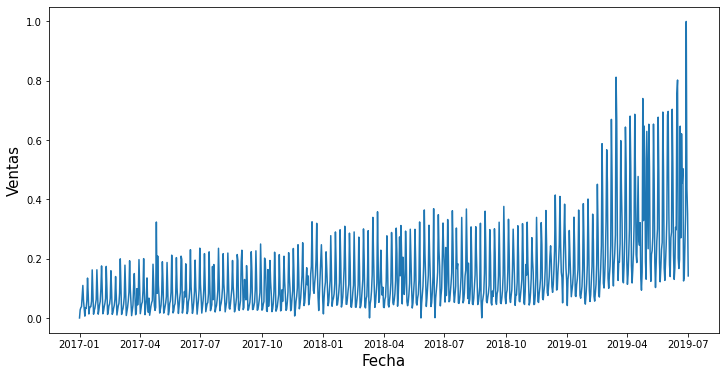

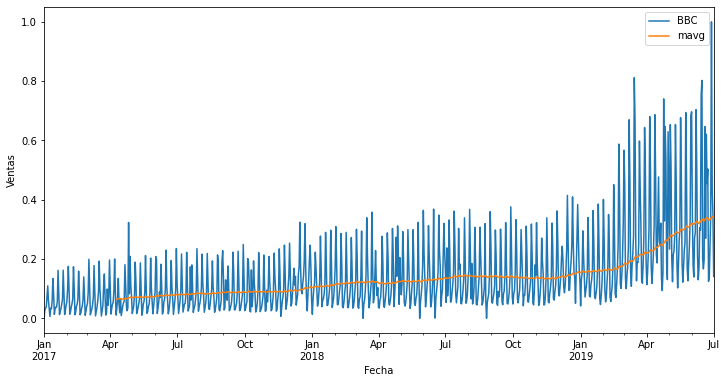

In [6]:
# Visualize the training stock data:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12,6))
plt.plot(df["Ventas"])
plt.xlabel('Fecha',fontsize=15)
plt.ylabel('Ventas',fontsize=15)
plt.show()


# Rolling mean
close_px = df['Ventas']
mavg = close_px.rolling(window=100).mean()

plt.figure(figsize = (12,6))
close_px.plot(label='BBC')
mavg.plot(label='mavg')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()

In [7]:
import matplotlib.dates as mdates

# change the dates into ints for training 
dates_df = df.copy()
dates_df = dates_df.reset_index()

# Store the original dates for plotting the predicitons
org_dates = dates_df['Fecha']

# convert to ints
dates_df['Fecha'] = dates_df['Fecha'].map(mdates.date2num)

dates_df.tail()

,Fecha,Ventas
907,737237.0,0.349534
908,737238.0,1.000000
909,737239.0,0.436262
910,737240.0,0.352490
911,737241.0,0.141742


In [8]:
# Use sklearn support vector regression to predicit our data:
from sklearn.svm import SVR

dates = dates_df['Fecha'].to_numpy()
prices = df['Ventas'].to_numpy()



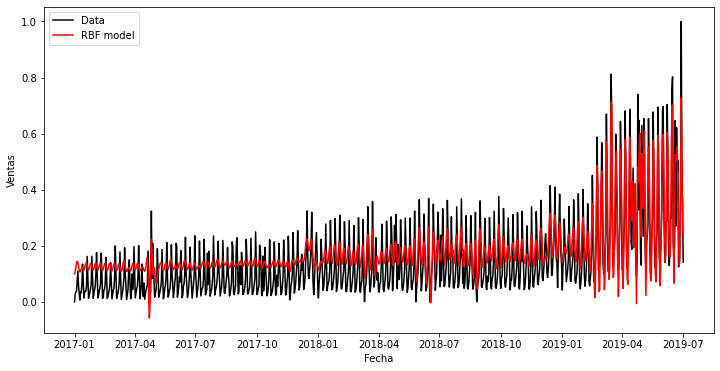

In [11]:
#Convert to 1d Vector
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1))

svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
svr_rbf.fit(dates, prices)

plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') 
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()